In [ ]:
https://github.com/Kathry1/TeamChallenge_team8/tree/main/Team_Challenge/data

In [5]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from toolbox_ml import describe_df
from toolbox_ml import tipifica_variables

In [10]:
from toolbox_ml import (
    describe_df,
    tipifica_variables,
    get_features_num_regression,
    plot_features_num_regression,
    get_features_cat_regression,
    plot_features_cat_regression
)

In [ ]:
import pandas as pd

data = pd.read_csv("./data/sleep_health_and_lifestyle_dataset.csv")

data.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:

result = describe_df(data)

result

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
Person ID,int64,0.00000,374,100.000000
Gender,object,0.00000,2,0.534759
Age,int64,0.00000,31,8.288770
Occupation,object,0.00000,11,2.941176
Sleep Duration,float64,0.00000,27,7.219251
Quality of Sleep,int64,0.00000,6,1.604278
Physical Activity Level,int64,0.00000,16,4.278075
Stress Level,int64,0.00000,6,1.604278
BMI Category,object,0.00000,4,1.069519


In [8]:
result = tipifica_variables(data, umbral_categoria=3, umbral_continua=0.5)
result

,nombre_variable,tipo_sugerido
0,Person ID,Numerica Continua
1,Gender,Binaria
2,Age,Numerica Discreta
3,Occupation,Numerica Discreta
4,Sleep Duration,Numerica Discreta
5,Quality of Sleep,Numerica Discreta
6,Physical Activity Level,Numerica Discreta
7,Stress Level,Numerica Discreta
8,BMI Category,Numerica Discreta
9,Blood Pressure,Numerica Discreta


In [12]:
numerical_features = get_features_num_regression(
    data, 
    target_col="Quality of Sleep",  # Neue Zielspalte
    umbral_corr=0.1, 
    pvalue=0.05
)
print(numerical_features)


['Person ID', 'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate']


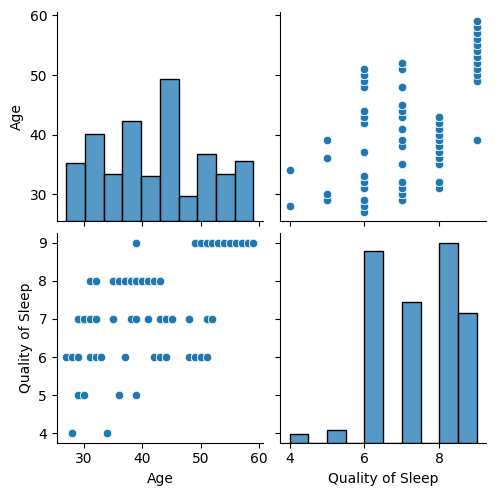

['Age']

In [14]:
plot_features_num_regression(
    data, 
    target_col="Quality of Sleep",  # Angepasste Zielvariable
    columns=["Age"],  # Beibehaltung der Spalte "Age"
    umbral_corr=0.1, 
    pvalue=0.05
)


In [15]:
categorical_features = get_features_cat_regression(
    data, 
    target_col="Quality of Sleep",  # Angepasste Zielvariable
    pvalue=0.05
)
print(categorical_features)


['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']


c:\Users\kthfu\DS Work TC\Team_Challenge\toolbox_ml.py:202: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estadistico, p_valor = f_oneway(*grupos)


In [16]:
print(data['BMI Category'].value_counts())
print(data['Blood Pressure'].value_counts())


BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64


Presion arterial debe ser convertido en grupos....

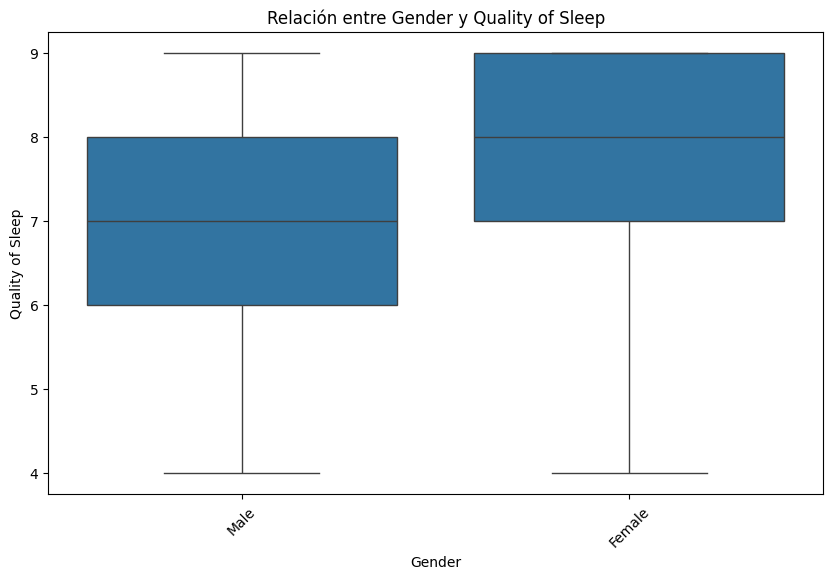

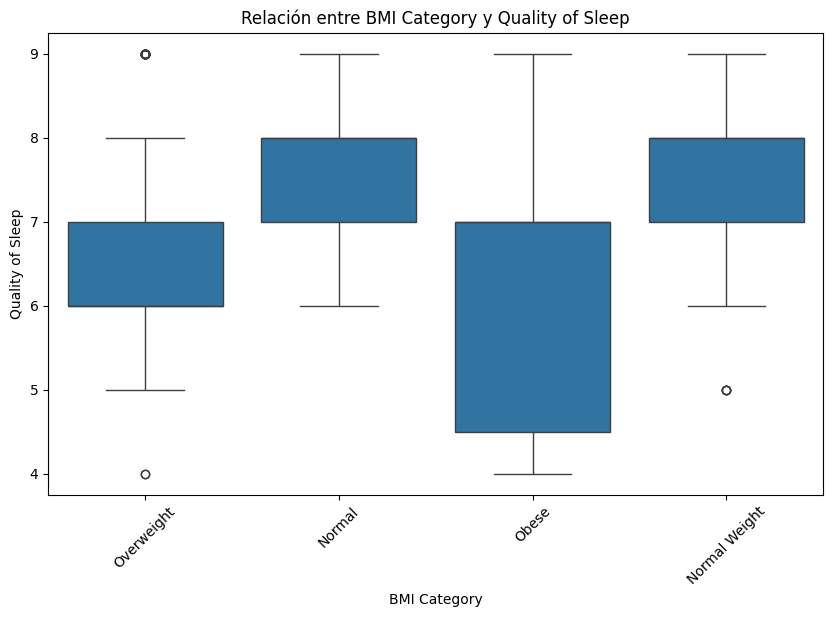

['Gender', 'BMI Category']

In [17]:
plot_features_cat_regression(
    data,
    target_col="Quality of Sleep",  # Angepasste Zielspalte
    columns=["Gender", "BMI Category"],  # Existierende Spalten
    pvalue=0.05,
    with_individual_plot=True
)
